## Practical Machine Learning
### Assignment 7 - Image Processing with Convolutional Neural Networks(CNN)

Description:
This assignment follows the same structure as Assignment 6. We will employ at least a 2x2 completely crossed experimental design. We will again use a simple training-and-test regimen, perhaps with a three-way partitioning of the data into training, dev, and test sets. The factors in the design may include numbers of layers and/or nodes within layers, types of layers (convolutional or pooling), and/or other hyperparameters. We will utilize convolutional neural networks (CNNs) within Python TensorFlow. 

The case data present a binary classification task, a subset of the data from a Kaggle competition in 2013
https://www.kaggle.com/c/dogs-vs-cats

The original data consisted of 25,000 images of cats and dogs. To ensure that the problem may be run on typical personal computers with limited memory and no graphical processing units (GPUs), we work with only 2,000 images: 1,000 cat images and 1,000 dog images. The original image files are provided in a zip archive:

cats_dogs_images.zip

After the data have been prepared for analysis in a jump-start program 
(included in the zip archive cats-dogs-jump-start-v002.zip under Modules / Technology Resources), 
we will divide the images into training, dev, and test sets for evaluating alternative neural network models per our experimental design.

Management Problem
Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?

Programming Resources
Refer once again to the programming resources cited under Assignment 6. Convolutional neural network coding examples are provided in the Géron (2017) textbook.

Géron, A. (2017). Hands-on machine learning with Scikit-Learn & TensorFlow: Concepts, tools, and techniques to build intelligent systems. Sebastopol, CA: O'Reilly. [ISBN-13 978-1-491-96229-9]. Chapter 13: Convolutional Neural Networks (pp. 353–378)  Source code available here (Links to an external site.)Links to an external site.. 

Regarding memory issues. With the large number of parameters being fit in deep learning tasks, out-of-memory errors may be encountered on personal computers. Géron (2017, p. 363) provides these suggestions with regard to CNNs:

If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats.

Additional background regarding computer vision, CNNs, and TensorFlow is provided under:

Modules / Technology Resources / Convolutional Neural Networks with TensorFlow

 

Grading Guidelines (50 points)
(1) Data preparation, exploration, visualization (10 points)
(2) Review research design and modeling methods (10 points)
(3) Review results, evaluate models (10 points)
(4) Implementation and programming (10 points)
(5) Exposition, problem description, and management recommendations (10 points)

 
Deliverables and File Formats
- Please upload the completed jupyter notebook (PREFERRED)

OR

Create a folder or directory with all supplementary files with your last name at the beginning of the folder name, compress that folder with zip compression, and post the zip-archived folder under the assignment link in Canvas. The following files should be included in an archive folder/directory that is uploaded as a single zip-compressed file. (Use zip, not StuffIt or any 7z or other compression method.)

1. Provide a double-spaced paper with a two-page maximum for the text. The paper should include (1) a summary and problem definition for management; (2) discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed; (3) overview of programming work; and (4) review of results with recommendations for management. (The paper must be provided as an Adobe Acrobat pdf file. MS Word files are NOT acceptable.)

2. Files or links to files should be provided in the format as used by the Python program.

3. Complete program code in Python used to access and analyze the data. The code should be submitted as a plain text file, so it can be executed as a program in a single Python program execution within an interactive Python shell. (You may include a Python notebook in addition to the complete program code.) If there are calls to Python modules, ensure that the directory structure is maintained so that the main program may be fully executed. 

4. Output from the program, such as console listing/logs, text files, and graphics output for visualizations. If you use Professional Studies database servers or systems, include Linux logs of your sessions as plain text files.

5. List file names and descriptions of files in the zip-compressed folder/directory.


Formatting Python Code
Refer to Google’s Python Style Guide (Links to an external site.)Links to an external site. for ideas about formatting Python code

Also refer to Google’s TensorFlow Style Guide (Links to an external site.)Links to an external site.

Comment often and in detail, highlighting major sections of code, describing the thinking behind the modeling and programming methods being employed.

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")
import time
script_start_time = time.clock()
#ignore tensorflow related warnings
import os
import tensorflow as tf

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

In [2]:
# coding: utf-8

# Initial deep neural network set-up from 
# Géron, A. 2017. Hands-On Machine Learning with Scikit-Learn 
#    & TensorFlow: Concepts, Tools, and Techniques to Build 
#    Intelligent Systems. Sebastopol, Calif.: O'Reilly. 
#    [ISBN-13 978-1-491-96229-9] 
#    Source code available at https://github.com/ageron/handson-ml
#    See file 10_introduction_to_artificial_neural_networks.ipynb 
#    Revised from MNIST to Cats and Dogs to begin Assignment 7
#    #CatsDogs# comment lines show additions/revisions for Cats and Dogs

In [3]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

In [10]:
# Common imports for our work
import os 
import numpy as np
import tensorflow as tf


import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
import re # regular expressions
import pathlib
import scipy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.backends.backend_pdf import PdfPages
import sklearn
from datetime import datetime

import cv2
import seaborn as sns

import IPython.display as display
from PIL import Image

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.backend import clear_session

tf.keras.backend.set_image_data_format('channels_last')
from keras import backend
print(backend.image_data_format())
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

channels_last


Using TensorFlow backend.


##### Secure dataset and image preprocessing

In [11]:
# load data
PATH = os.path.join('cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs') 

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)
print("--------------------------------------")

test_dir_path = os.path.join('test_images')
test_dir = os.path.join('test_images','test')
num_test_dir = len(os.listdir(test_dir))
print("Total test images:", num_test_dir)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000
--------------------------------------
Total test images: 12500


In [12]:
# Helper functions
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split('(\d+)', text) ]

In [13]:
test_images_dogs_cats = [test_dir+i for i in os.listdir(test_dir)]
test_images_dogs_cats[0:5]

test_images_dogs_cats.sort(key=natural_keys)
test_images_dogs_cats[0:5]

['test_images\\test1.jpg',
 'test_images\\test10.jpg',
 'test_images\\test100.jpg',
 'test_images\\test1000.jpg',
 'test_images\\test10000.jpg']

['test_images\\test1.jpg',
 'test_images\\test2.jpg',
 'test_images\\test3.jpg',
 'test_images\\test4.jpg',
 'test_images\\test5.jpg']

In [14]:
##### Data Analysis & Preparation

In [16]:
RANDOM_SEED = 9999
batch_size = 100
epochs = 50
IMG_HEIGHT = 64
IMG_WIDTH = 64

Found 2000 images belonging to 2 classes.


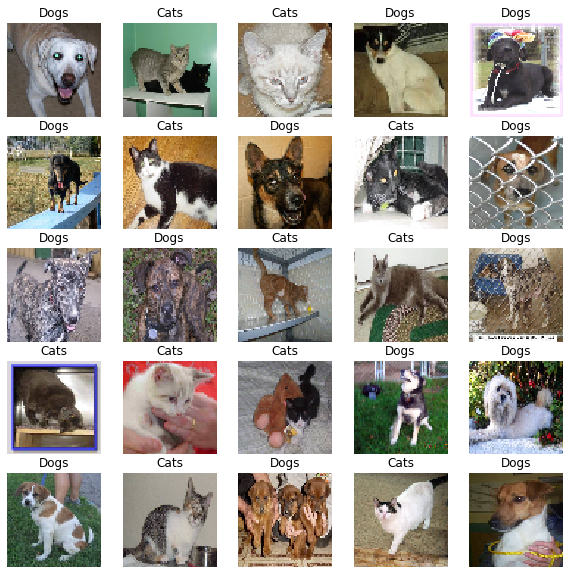

In [17]:
data_dir = pathlib.Path(train_dir)
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=batch_size,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [18]:
# data prep 
train_image_generator = ImageDataGenerator(rescale=1./255,
                                          data_format=('channels_last')) # Generator for training data
validation_image_generator = ImageDataGenerator(rescale=1./255,
                                               data_format=('channels_last')) # Generator for validation data


train_data_gen = train_image_generator.\
flow_from_directory(batch_size=batch_size,
                               directory=train_dir,
                               shuffle=True,
                               target_size=(IMG_HEIGHT, IMG_WIDTH),
                               class_mode='binary')

val_data_gen = validation_image_generator.\
flow_from_directory(batch_size=batch_size,
                              directory=validation_dir,
                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                              class_mode='binary')

train_data_gen.class_indices
val_data_gen.class_indices
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

{'cats': 0, 'dogs': 1}

(100, 64, 64, 3)

###### Convolution Neural Nets (CNNs) : Model 1
Model 1 : CNN (Convolutional Layer: 2, Pooling Layer: 2, Fully Connected Layer: 1, Activation Function: ReLU, Sigmoid)

In [102]:
clear_session()
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
channels = 3 # color images 

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1,activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

curr_dir = os.getcwd() 
model_folder = '\\saved_model\\'
spec_model = 'M1' 
save_dir = curr_dir+model_folder+spec_model
try:
    os.makedirs(save_dir)
    print("Success: Directory Created")
except FileExistsError:
    print("ERROR: Directory already exists")
    pass

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43808)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               22430208  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [22]:
%%time
start_time_M1 = time.clock()
# train the model 
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
# Save the entire model as a SavedModel.
model.save(save_dir) 
# Record end time for neural network training
stop_time_M1 = time.clock()
#Total processing time
runtime_M1 = stop_time_M1 - start_time_M1 

print("\nStart time:", start_time_M1)
print("Stop time:", stop_time_M1)
print("processing time:", runtime_M1)

train_score = model.evaluate(train_data_gen,verbose=2)
train_score
training_acc_M1 = train_score[1]
valid_score = model.evaluate(val_data_gen,verbose=2)
valid_score
valid_acc_M1 = valid_score[1]
print("\n")
print("-------- CNN Model 1 --------")
print("Training accuracy:"+str(training_acc_M1))
print("Validation accuracy:"+str(valid_acc_M1))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/50
20/20 [==============================] - 11s 532ms/step - loss: 0.7421 - accuracy: 0.5115 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 10s 481ms/step - loss: 0.6800 - accuracy: 0.5750 - val_loss: 0.6645 - val_accuracy: 0.6040
Epoch 3/50
20/20 [==============================] - 9s 470ms/step - loss: 0.6411 - accuracy: 0.6170 - val_loss: 0.6209 - val_accuracy: 0.6720
Epoch 4/50
20/20 [==============================] - 9s 473ms/step - loss: 0.5930 - accuracy: 0.6875 - val_loss: 0.5968 - val_accuracy: 0.6940
Epoch 5/50
20/20 [==============================] - 10s 492ms/step - loss: 0.5613 - accuracy: 0.7145 - val_loss: 0.5988 - val_accuracy: 0.6940
Epoch 6/50
20/20 [==============================] - 11s 533ms/step - loss: 0.5104 - accuracy: 0.7595 - val_loss: 0.5847 - val_accuracy: 0.7090
Epoch 7/50
20/20 [==============================] - 

10/10 - 3s - loss: 1.5698 - accuracy: 0.7220


-------- CNN Model 1 --------
Training accuracy:1.0
Validation accuracy:0.722
Wall time: 10min 48s


###### kaggle username: nameyeh
###### kaggle log loss: 1.61691

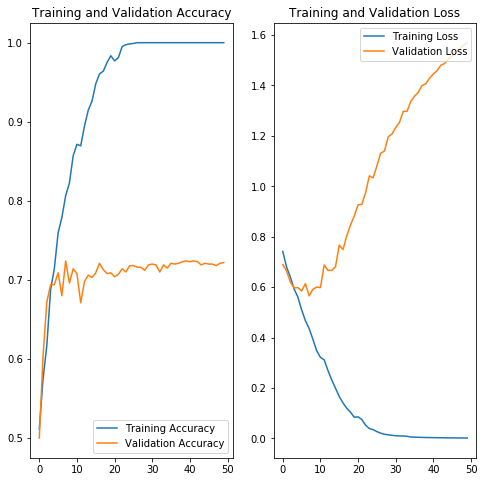

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show();

In [25]:
test_image_generator = ImageDataGenerator(rescale=1./255,data_format=('channels_last')) 
test_data_gen = test_image_generator.\
flow_from_directory(batch_size=batch_size,
                                directory=test_dir_path,
                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                classes=['test'],
                              # don't generate labels
                              class_mode=None,
                              # don't shuffle
                              shuffle=False)

Found 12500 images belonging to 1 classes.


In [26]:
%%time
prediction_probabilities = model.predict(test_data_gen,verbose=2)
predicted_val = [int(round(p[0])) for p in prediction_probabilities]

df=pd.DataFrame(test_data_gen.filenames,columns=['file'])
df['id'] = df['file'].str.extract('(\d+)', expand=True)
df['probs'] = prediction_probabilities
df['label'] = df['probs']
df['preds'] = predicted_val
df['id']=df['id'].astype('int64')
df=df.sort_values(by='id')
m1 = df # save full df 
df=df.drop(['file','preds','probs'],1)
df.tail()
df.head()
df.to_csv("cnn_model1F.csv",index=False)

125/125 - 50s
Wall time: 50.8 s


###### Convolution Neural Nets (CNNs) : Model 2
CNN (Convolutional Layer: 2, Pooling Layer: 2, Fully Connected Layer: 1, Activation Function: ReLU, Sigmoid, Dropout: Yes)

In [32]:
clear_session()
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
channels = 3 # color images 

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT,IMG_WIDTH,channels)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1,activation='sigmoid')])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

curr_dir = os.getcwd() 
model_folder = '\\saved_model\\'
spec_model = 'M2' 
save_dir = curr_dir+model_folder+spec_model
try:
    os.makedirs(save_dir)
    print("Success: Directory Created")
except FileExistsError:
    print("ERROR: Directory already exists")
    pass

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [34]:
%%time
start_time_M2 = time.clock()
# train the model 
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
# Save the entire model as a SavedModel.
model.save(save_dir) 

# Record end time for neural network training
stop_time_M2 = time.clock()
#Total processing time
runtime_M2 = stop_time_M2 - start_time_M2 

print("\nStart time:", start_time_M2)
print("Stop time:", stop_time_M2)
print("processing time:", runtime_M2)

train_score = model.evaluate(train_data_gen,verbose=2)
train_score
training_acc_M2 = train_score[1]
valid_score = model.evaluate(val_data_gen,verbose=2)
valid_score
valid_acc_M2 = valid_score[1]
print("\n")
print("-------- CNN Model 2 --------")
print("Training accuracy:"+str(training_acc_M2))
print("Validation accuracy:"+str(valid_acc_M2))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/50
20/20 [==============================] - 10s 501ms/step - loss: 0.7768 - accuracy: 0.5065 - val_loss: 0.6856 - val_accuracy: 0.5110
Epoch 2/50
20/20 [==============================] - 9s 463ms/step - loss: 0.6752 - accuracy: 0.5810 - val_loss: 0.6652 - val_accuracy: 0.6200
Epoch 3/50
20/20 [==============================] - 10s 497ms/step - loss: 0.6488 - accuracy: 0.6175 - val_loss: 0.6360 - val_accuracy: 0.6710
Epoch 4/50
20/20 [==============================] - 10s 483ms/step - loss: 0.6073 - accuracy: 0.6680 - val_loss: 0.6170 - val_accuracy: 0.6700
Epoch 5/50
20/20 [==============================] - 10s 493ms/step - loss: 0.5748 - accuracy: 0.7040 - val_loss: 0.6046 - val_accuracy: 0.6700
Epoch 6/50
20/20 [==============================] - 11s 535ms/step - loss: 0.5457 - accuracy: 0.7285 - val_loss: 0.6000 - val_accuracy: 0.6850
Epoch 7/50
20/20 [==============================] -

###### kaggle username: nameyeh
###### kaggle log loss: 0.94872

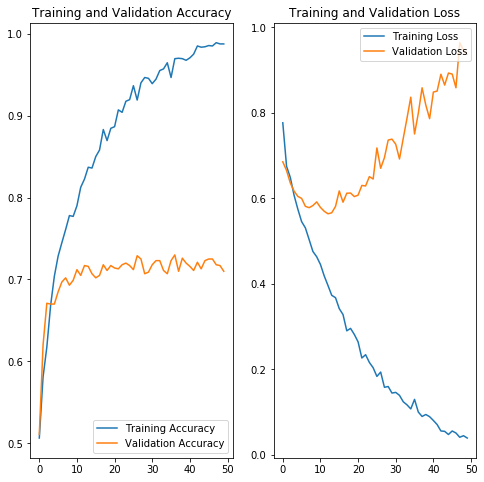

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show();

In [37]:
test_image_generator = ImageDataGenerator(rescale=1./255,data_format=('channels_last')) 
test_data_gen = test_image_generator.\
flow_from_directory(batch_size=batch_size,
                                directory=test_dir_path,
                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                classes=['test'],
                              # don't generate labels
                              class_mode=None,
                              # don't shuffle
                              shuffle=False)
# %%time
prediction_probabilities = model.predict(test_data_gen,verbose=2)
predicted_val = [int(round(p[0])) for p in prediction_probabilities]

df=pd.DataFrame(test_data_gen.filenames,columns=['file'])
df['id'] = df['file'].str.extract('(\d+)', expand=True)
df['probs'] = prediction_probabilities
df['label'] = df['probs']
df['preds'] = predicted_val
df['id']=df['id'].astype('int64')
df=df.sort_values(by='id')
m2 = df # save full df 
df=df.drop(['file','preds','probs'],1)
df.head()
df.to_csv("cnn_model2F.csv",index=False)

Found 12500 images belonging to 1 classes.
125/125 - 37s


,id,label
2775,12496,0.000004
2776,12497,0.064435
2777,12498,0.016468
2778,12499,0.999241
2781,12500,0.000515


,id,label
0,1,0.975927
3612,2,0.100352
4723,3,0.325775
5834,4,1.000000
6945,5,0.000001


##### Data Augmentation

In [38]:
# data augmentation
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# Randomly rotate the image
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

# plotImages(augmented_images) zoom images up to 50% randomly.
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# train generator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

# dont apply data augmentation to validation set 
# rescale and convert to batches 
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


###### Convolution Neural Nets (CNNs) : Model 3
CNN (Convolutional Layer: 3, Pooling Layer: 3, Fully Connected Layer: 1, Activation Function: ReLU, Sigmoid, Dropout: Yes)

In [101]:
clear_session()
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
channels = 3 # color images 

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model.summary()

curr_dir = os.getcwd() 
model_folder = '\\saved_model\\'
spec_model = 'M3' 
save_dir = curr_dir+model_folder+spec_model
try:
    os.makedirs(save_dir)
    print("Success: Directory Created")
except FileExistsError:
    print("ERROR: Directory already exists")
    pass

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

In [43]:
%%time
start_time_M3 = time.clock()
# train the model 
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
# Save the entire model as a SavedModel.
model.save(save_dir) 
# Record end time for neural network training
stop_time_M3 = time.clock()
#Total processing time
runtime_M3 = stop_time_M3 - start_time_M3 

print("\nStart time:", start_time_M3)
print("Stop time:", stop_time_M3)
print("processing time:", runtime_M3)

train_score = model.evaluate(train_data_gen,verbose=2)
train_score
training_acc_M3 = train_score[1]
valid_score = model.evaluate(val_data_gen,verbose=2)
valid_score
valid_acc_M3 = valid_score[1]
print("\n")
print("-------- CNN Model 3 --------")
print("Training accuracy:"+str(training_acc_M3))
print("Validation accuracy:"+str(valid_acc_M3))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/50
20/20 [==============================] - 12s 619ms/step - loss: 0.7050 - accuracy: 0.5015 - val_loss: 0.6855 - val_accuracy: 0.5130
Epoch 2/50
20/20 [==============================] - 12s 606ms/step - loss: 0.6815 - accuracy: 0.5180 - val_loss: 0.6642 - val_accuracy: 0.6160
Epoch 3/50
20/20 [==============================] - 13s 627ms/step - loss: 0.6667 - accuracy: 0.5810 - val_loss: 0.6485 - val_accuracy: 0.6310
Epoch 4/50
20/20 [==============================] - 12s 597ms/step - loss: 0.6661 - accuracy: 0.5765 - val_loss: 0.6629 - val_accuracy: 0.5570
Epoch 5/50
20/20 [==============================] - 13s 634ms/step - loss: 0.6554 - accuracy: 0.6040 - val_loss: 0.6304 - val_accuracy: 0.6260
Epoch 6/50
20/20 [==============================] - 14s 686ms/step - loss: 0.6402 - accuracy: 0.6265 - val_loss: 0.6355 - val_accuracy: 0.6280
Epoch 7/50
20/20 [==============================] 

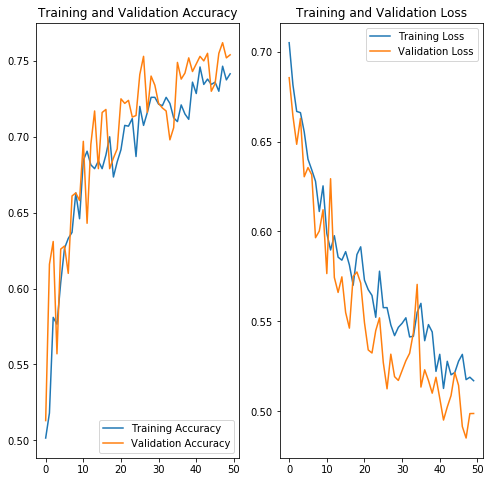

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show();

In [45]:
test_image_generator = ImageDataGenerator(rescale=1./255,data_format=('channels_last')) 
test_data_gen = test_image_generator.\
flow_from_directory(batch_size=batch_size,
                                directory=test_dir_path,
                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                classes=['test'],
                              # don't generate labels
                              class_mode=None,
                              # don't shuffle
                              shuffle=False)
# %%time
prediction_probabilities = model.predict(test_data_gen,verbose=2)
predicted_val = [int(round(p[0])) for p in prediction_probabilities]

df=pd.DataFrame(test_data_gen.filenames,columns=['file'])
df['id'] = df['file'].str.extract('(\d+)', expand=True)
df['probs'] = prediction_probabilities
df['label'] = df['probs']
df['preds'] = predicted_val
df['id']=df['id'].astype('int64')
df=df.sort_values(by='id')
m3 = df # save full df 
df=df.drop(['file','preds','probs'],1)
df.head()
df.to_csv("cnn_model3F.csv",index=False)

Found 12500 images belonging to 1 classes.
125/125 - 40s


,id,label
0,1,0.458373
3612,2,0.772606
4723,3,0.759935
5834,4,0.999689
6945,5,0.236241


###### kaggle username: nameyeh
###### kaggle log loss: 0.51724

###### Convolution Neural Nets (CNNs) : Model 4
CNN (Convolutional Layer: 4, Pooling Layer: 4, Fully Connected Layer: 1, Activation Function: ReLU, Sigmoid, Dropout: Yes)

In [100]:
clear_session()
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
channels = 3 # color images 

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model.summary()

curr_dir = os.getcwd() 
model_folder = '\\saved_model\\'
spec_model = 'M4' 
save_dir = curr_dir+model_folder+spec_model
try:
    os.makedirs(save_dir)
    print("Success: Directory Created")
except FileExistsError:
    print("ERROR: Directory already exists")
    pass

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

In [47]:
%%time
start_time_M4 = time.clock()
# train the model 
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
# Save the entire model as a SavedModel.
model.save(save_dir) 
# Record end time for neural network training
stop_time_M4 = time.clock()
#Total processing time
runtime_M4 = stop_time_M4 - start_time_M4 

print("\nStart time:", start_time_M4)
print("Stop time:", stop_time_M4)
print("processing time:", runtime_M4)

train_score = model.evaluate(train_data_gen,verbose=2)
train_score
training_acc_M4 = train_score[1]
valid_score = model.evaluate(val_data_gen,verbose=2)
valid_score
valid_acc_M4 = valid_score[1]
print("\n")
print("-------- CNN Model 4 --------")
print("Training accuracy:"+str(training_acc_M4))
print("Validation accuracy:"+str(valid_acc_M4))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/50
20/20 [==============================] - 13s 654ms/step - loss: 0.6962 - accuracy: 0.5030 - val_loss: 0.6911 - val_accuracy: 0.6080
Epoch 2/50
20/20 [==============================] - 12s 623ms/step - loss: 0.6869 - accuracy: 0.5480 - val_loss: 0.6719 - val_accuracy: 0.5450
Epoch 3/50
20/20 [==============================] - 12s 625ms/step - loss: 0.6767 - accuracy: 0.5680 - val_loss: 0.6687 - val_accuracy: 0.5790
Epoch 4/50
20/20 [==============================] - 13s 642ms/step - loss: 0.6742 - accuracy: 0.5615 - val_loss: 0.6536 - val_accuracy: 0.5690
Epoch 5/50
20/20 [==============================] - 16s 809ms/step - loss: 0.6621 - accuracy: 0.6065 - val_loss: 0.6556 - val_accuracy: 0.5850
Epoch 6/50
20/20 [==============================] - 14s 711ms/step - loss: 0.6672 - accuracy: 0.5845 - val_loss: 0.6584 - val_accuracy: 0.6170
Epoch 7/50
20/20 [==============================] 

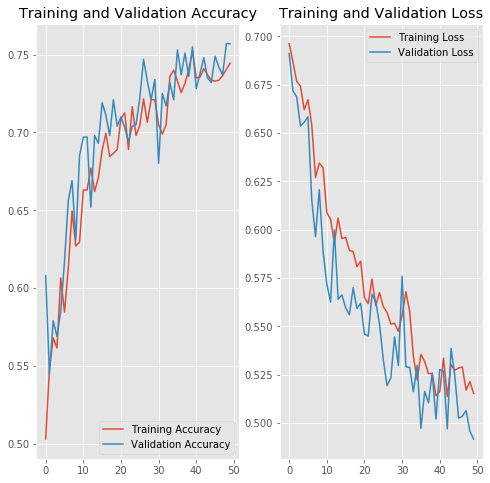

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show();

###### kaggle username: nameyeh
###### kaggle log loss: 0.50370

In [49]:
test_image_generator = ImageDataGenerator(rescale=1./255,data_format=('channels_last')) 
test_data_gen = test_image_generator.\
flow_from_directory(batch_size=batch_size,
                                directory=test_dir_path,
                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                classes=['test'],
                              # don't generate labels
                              class_mode=None,
                              # don't shuffle
                              shuffle=False)
# %%time
prediction_probabilities = model.predict(test_data_gen,verbose=2)
predicted_val = [int(round(p[0])) for p in prediction_probabilities]

df=pd.DataFrame(test_data_gen.filenames,columns=['file'])
df['id'] = df['file'].str.extract('(\d+)', expand=True)
df['probs'] = prediction_probabilities
df['label'] = df['probs']
df['preds'] = predicted_val
df['id']=df['id'].astype('int64')
df=df.sort_values(by='id')
m4 = df # save full df 
df=df.drop(['file','preds','probs'],1)
df.head()
df.to_csv("cnn_model4F.csv",index=False)

Found 12500 images belonging to 1 classes.
125/125 - 40s


,id,label
2775,12496,0.080567
2776,12497,0.079562
2777,12498,0.127743
2778,12499,0.689808
2781,12500,0.136358


,id,label
0,1,0.764407
3612,2,0.970223
4723,3,0.763427
5834,4,0.998752
6945,5,0.144336


###### Convolution Neural Nets (CNNs) : Model 5
CNN (Convolutional Layer: 6, Pooling Layer: 6, Fully Connected Layer: 1, Activation Function: ReLU, Sigmoid, Dropout: Yes)

In [99]:
clear_session()
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
channels = 3 # color images 

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model.summary()

curr_dir = os.getcwd() 
model_folder = '\\saved_model\\'
spec_model = 'M5' 
save_dir = curr_dir+model_folder+spec_model
try:
    os.makedirs(save_dir)
    print("Success: Directory Created")
except FileExistsError:
    print("ERROR: Directory already exists")
    pass

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

In [71]:
%%time
start_time_M5 = time.clock()
# train the model 
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
# Save the entire model as a SavedModel.
model.save(save_dir) 
# Record end time for neural network training
stop_time_M5 = time.clock()
#Total processing time
runtime_M5 = stop_time_M5 - start_time_M5 

print("\nStart time:", start_time_M5)
print("Stop time:", stop_time_M5)
print("processing time:", runtime_M5)

train_score = model.evaluate(train_data_gen,verbose=2)
train_score
training_acc_M5 = train_score[1]
valid_score = model.evaluate(val_data_gen,verbose=2)
valid_score
valid_acc_M5 = valid_score[1]
print("\n")
print("-------- CNN Model 5 --------")
print("Training accuracy:"+str(training_acc_M5))
print("Validation accuracy:"+str(valid_acc_M5))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/50
20/20 [==============================] - 29s 1s/step - loss: 0.6936 - accuracy: 0.5145 - val_loss: 0.6882 - val_accuracy: 0.5020
Epoch 2/50
20/20 [==============================] - 24s 1s/step - loss: 0.6916 - accuracy: 0.5025 - val_loss: 0.6908 - val_accuracy: 0.5330
Epoch 3/50
20/20 [==============================] - 24s 1s/step - loss: 0.6845 - accuracy: 0.5410 - val_loss: 0.6601 - val_accuracy: 0.6190
Epoch 4/50
20/20 [==============================] - 25s 1s/step - loss: 0.6724 - accuracy: 0.5755 - val_loss: 0.6540 - val_accuracy: 0.5920
Epoch 5/50
20/20 [==============================] - 25s 1s/step - loss: 0.6863 - accuracy: 0.5355 - val_loss: 0.6549 - val_accuracy: 0.6130
Epoch 6/50
20/20 [==============================] - 23s 1s/step - loss: 0.6636 - accuracy: 0.5800 - val_loss: 0.6537 - val_accuracy: 0.5880
Epoch 7/50
20/20 [==============================] - 21s 1s/step - lo

###### kaggle username: nameyeh
###### kaggle log loss: 0.53413

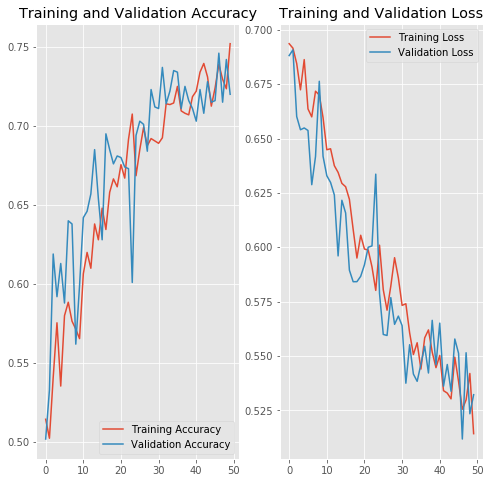

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show();

In [73]:
test_image_generator = ImageDataGenerator(rescale=1./255,data_format=('channels_last')) 
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                directory=test_dir_path,
                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                classes=['test'],
                              # don't generate labels
                              class_mode=None,
                              # don't shuffle
                              shuffle=False)

Found 12500 images belonging to 1 classes.


In [74]:
# %%time
prediction_probabilities = model.predict(test_data_gen,verbose=2)
predicted_val = [int(round(p[0])) for p in prediction_probabilities]

df=pd.DataFrame(test_data_gen.filenames,columns=['file'])
df['id'] = df['file'].str.extract('(\d+)', expand=True)
df['probs'] = prediction_probabilities
df['label'] = df['probs']
df['preds'] = predicted_val
df['id']=df['id'].astype('int64')
df=df.sort_values(by='id')
m5 = df # save full df 
df=df.drop(['file','preds','probs'],1)
df.head()
df.to_csv("cnn_mode5F.csv",index=False)

125/125 - 44s


,id,label
0,1,0.784584
3612,2,0.909843
4723,3,0.825318
5834,4,0.969988
6945,5,0.219044


In [ ]:
# script_stop_time = time.clock()

# script_runtime = script_stop_time - script_start_time 
# script_runtime/60

##### Try with different image resolutions as well 

In [80]:
RANDOM_SEED = 9999
batch_size = 100
epochs = 50
IMG_HEIGHT = 150
IMG_WIDTH = 150
# data prep & augmentation
# train generator
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
# dont apply data augmentation to validation set 
# rescale and convert to batches 
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')
train_data_gen.class_indices
val_data_gen.class_indices
sample_training_images, _ = next(train_data_gen)
sample_training_images.shape

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


{'cats': 0, 'dogs': 1}

{'cats': 0, 'dogs': 1}

(100, 150, 150, 3)

###### Convolution Neural Nets (CNNs) : Model 6 - Same as Model 4, run on 150X150 augemented images
CNN (Convolutional Layer: 4, Pooling Layer: 4, Fully Connected Layer: 1, Activation Function: ReLU, Sigmoid, Dropout: Yes)

In [81]:
clear_session()
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
channels = 3 # color images 

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
model.summary()

curr_dir = os.getcwd() 
model_folder = '\\saved_model\\'
spec_model = 'M6' 
save_dir = curr_dir+model_folder+spec_model
try:
    os.makedirs(save_dir)
    print("Success: Directory Created")
except FileExistsError:
    print("ERROR: Directory already exists")
    pass

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        1

In [82]:
%%time
start_time_M6 = time.clock()
# train the model 
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)
# Save the entire model as a SavedModel.
model.save(save_dir) 
# Record end time for neural network training
stop_time_M6 = time.clock()
#Total processing time
runtime_M6 = stop_time_M6 - start_time_M6 

print("\nStart time:", start_time_M6)
print("Stop time:", stop_time_M6)
print("processing time:", runtime_M6)

train_score = model.evaluate(train_data_gen,verbose=2)
train_score
training_acc_M6 = train_score[1]
valid_score = model.evaluate(val_data_gen,verbose=2)
valid_score
valid_acc_M6 = valid_score[1]
print("\n")
print("-------- CNN Model 6 --------")
print("Training accuracy:"+str(training_acc_M6))
print("Validation accuracy:"+str(valid_acc_M6))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 10 steps
Epoch 1/50
20/20 [==============================] - 38s 2s/step - loss: 0.7174 - accuracy: 0.4830 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
20/20 [==============================] - 46s 2s/step - loss: 0.6932 - accuracy: 0.4975 - val_loss: 0.6919 - val_accuracy: 0.6190
Epoch 3/50
20/20 [==============================] - 49s 2s/step - loss: 0.6889 - accuracy: 0.5375 - val_loss: 0.6675 - val_accuracy: 0.6160
Epoch 4/50
20/20 [==============================] - 48s 2s/step - loss: 0.6750 - accuracy: 0.5740 - val_loss: 0.6568 - val_accuracy: 0.6320
Epoch 5/50
20/20 [==============================] - 49s 2s/step - loss: 0.6666 - accuracy: 0.5805 - val_loss: 0.6347 - val_accuracy: 0.6360
Epoch 6/50
20/20 [==============================] - 51s 3s/step - loss: 0.6481 - accuracy: 0.6130 - val_loss: 0.6300 - val_accuracy: 0.6290
Epoch 7/50
20/20 [==============================] - 49s 2s/step - lo

###### kaggle username: nameyeh
###### kaggle log loss: 0.52464

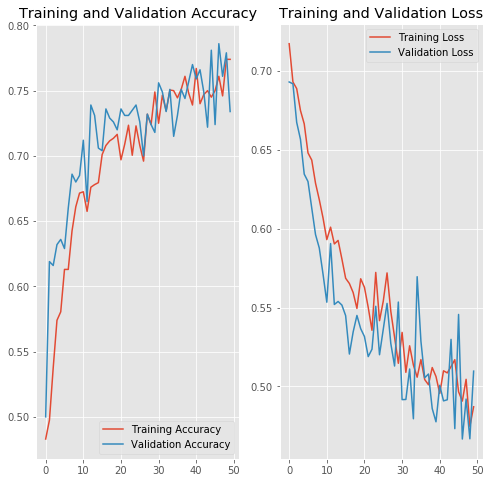

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
plt.style.use('ggplot')
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show();

In [84]:
test_image_generator = ImageDataGenerator(rescale=1./255,data_format=('channels_last')) 
test_data_gen = test_image_generator.\
flow_from_directory(batch_size=batch_size,
                                directory=test_dir_path,
                                target_size=(IMG_HEIGHT, IMG_WIDTH),
                                classes=['test'],
                              # don't generate labels
                              class_mode=None,
                              # don't shuffle
                              shuffle=False)

Found 12500 images belonging to 1 classes.


In [85]:
# %%time
prediction_probabilities = model.predict(test_data_gen,verbose=2)
predicted_val = [int(round(p[0])) for p in prediction_probabilities]

df=pd.DataFrame(test_data_gen.filenames,columns=['file'])
df['id'] = df['file'].str.extract('(\d+)', expand=True)
df['probs'] = prediction_probabilities
df['label'] = df['probs']
df['preds'] = predicted_val
df['id']=df['id'].astype('int64')
df=df.sort_values(by='id')
m6 = df # save full df 
df=df.drop(['file','preds','probs'],1)
df.head()
df.to_csv("cnn_model6F.csv",index=False)

125/125 - 74s


,id,label
0,1,0.740045
3612,2,0.858707
4723,3,0.164234
5834,4,0.981477
6945,5,0.159065


In [ ]:
script_stop_time = time.clock()
script_runtime = script_stop_time - script_start_time 
print("Approximate time to run ALL MODELS:"+str(script_runtime/60))

##### Summary Table

In [ ]:
# -------- CNN Model 1 --------
# Training accuracy:1.0
# Validation accuracy:0.722
# Wall time: 10min 48s
# -------- CNN Model 2 --------
# Training accuracy:1.0
# Validation accuracy:0.71
# Wall time: 10min 23s
# -------- CNN Model 3 --------
# Training accuracy:0.7565
# Validation accuracy:0.754
# Wall time: 13min 8s
# -------- CNN Model 4 --------
# Training accuracy:0.735
# Validation accuracy:0.757
# Wall time: 13min 20s
# -------- CNN Model 5 --------
# Training accuracy:0.7535
# Validation accuracy:0.72
# Wall time: 18min 10s
# -------- CNN Model 6 --------
# Training accuracy:0.731
# Validation accuracy:0.734
# Wall time: 41min 3s

In [87]:
summary_DF =\
pd.DataFrame([["M1", "M2", "M3", "M4","M5","M6"],
              [2,2,3,4,6,4],
              [2,2,3,4,6,4],
              [1,1,1,1,1,1],
              ['Relu, Sigmoid','Relu, Sigmoid','Relu, Sigmoid','Relu, Sigmoid','Relu, Sigmoid','Relu, Sigmoid'],
              ['No','Yes','Yes','Yes','Yes','Yes'],
              [round(runtime_M1/60,1), round(runtime_M2/60,1), round(runtime_M3/60,), 
               round(runtime_M4/60,1),round(runtime_M5/60,1),round(runtime_M6/60,1)],
              [1.0, 1.0, 0.7565, 0.735,0.7535,0.731],
              [0.722, 0.71, 0.754, 0.757,0.72,0.734], 
              [1.61691,0.94872,0.51724,0.50370,0.53413,0.52464]] ).T

# Column Name and Index
summary_DF.columns = ["Model", "Convolutional Layers", "Pooling Layers", "Fully Connected Layers",
                      "Activate Function","Dropout","Run_Time","Training_Set Accuracy","Test_Set Accuracy", "Kaggle Log Loss"]
print('------------------------------- CNN Summary Table -------------------------------')
summary_DF

------------------------------- CNN Summary Table -------------------------------


,Model,Convolutional Layers,Pooling Layers,Fully Connected Layers,Activate Function,Dropout,Run_Time,Training_Set Accuracy,Test_Set Accuracy,Kaggle Log Loss
0,M1,2,2,1,"Relu, Sigmoid",No,10.6,1,0.722,1.61691
1,M2,2,2,1,"Relu, Sigmoid",Yes,10.2,1,0.71,0.94872
2,M3,3,3,1,"Relu, Sigmoid",Yes,13,0.7565,0.754,0.51724
3,M4,4,4,1,"Relu, Sigmoid",Yes,13.1,0.735,0.757,0.5037
4,M5,6,6,1,"Relu, Sigmoid",Yes,17.9,0.7535,0.72,0.53413
5,M6,4,4,1,"Relu, Sigmoid",Yes,40.6,0.731,0.734,0.52464


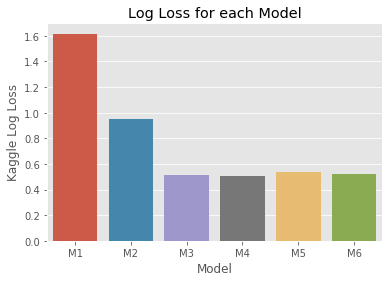

In [97]:
import seaborn as sns
sns.barplot(summary_DF["Model"], summary_DF["Kaggle Log Loss"]).set_title("Log Loss for each Model");

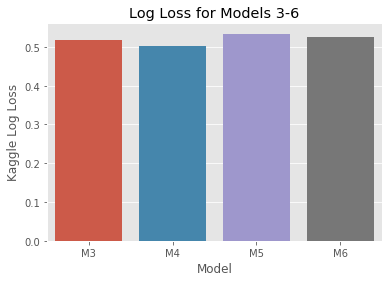

In [98]:
df=summary_DF[~summary_DF['Model'].isin(['M1','M2'])]
sns.barplot(df["Model"], df["Kaggle Log Loss"]).set_title("Log Loss for Models 3-6");

#### REPORT/FINDINGS: 
(1) A summary and problem definition for management; 

Assume that we are providing advice to a website provider who is looking for tools to automatically label images provided by end users. As we look across the factors in the study, making recommendations to management about image classification, we are most concerned about achieving the highest possible accuracy in image classification. That is, we should be willing to sacrifice training time for model accuracy. What type of machine learning model works best? If it is a convolutional neural network, what type of network should we use? Part of this recommendation may concern information about the initial images themselves (input data for the classification task). What types of images work best?

---

(2) Discussion of the research design, measurement and statistical methods, traditional and machine learning methods employed 

In this assignment, we used the cats and dogs kaggle dataset to train models to correctly distinguish and classify images of cats and dogs. We fitted six convolutional  neural networks, comparing processing time and performance across experimental treatments.

---

(3) Overview of programming work; & (4) Review of results with recommendations for management.

We downloaded the dataset images from kaggle, created directories, and loaded the data into tensorflow data generators. For training, we used 1000 images of cats and 1000 images of dogs; for validation, we used 500 images of each class. We created six models and plotted the train&validation accuracies and train&validation losses. We set the image size at 64X64 for Models 1-5, and increased it to 150X150 for Model 6. Model 1 CNN had 2 conv layers, 2 pooling layers, 1 fully connected, activation functions relu & sigmoid, and no dropout. Training accuracy was 100%, validation accuracy was 72%, and kaggle log loss was 1.61691. Model 2 was identical to Model 1, except we also added dropout, resulting in a log loss of 0.94872. We then decided to augment the data by applying horizontal flip, random rotation of 45, width & height shift of .15, and 50% zoom. We ran Models 3,4,&5 on this augmented dataset. Model 3 CNN with dropout had 3 conv layers, 3 pooling layers, 1 fully connected, activation functions relu & sigmoid, and resulted in a log loss of 0.51724. Models 4 & 5 were identical to Model 3, except Model 4 had 4 conv and pooling layers, and Model 5 had 6 conv and pooling layers. Model 4 had a log loss of 0.50370, but Model 5 had a lower log loss of 0.53413. To see if image resolution made a difference, we ran Model 6 on 150X150 images, with the same augmentation parameters, and model parameters were identical to Model 4 (the model with the best log loss). However, this resulted in a log loss of 0.52464.

For image classification tasks, convolutional neural networks (CNNs) are most commonly used. We should recommend Model 4 (CNN with dropout, 4 conv layers, 4 pooling layers, 1 fully connected, & ReLU, Sigmoid activation functions);  this model had one of the lowest runtimes (13 minutes) and the best log loss of 0.50370. Since constructing a deeper architecture and increasing image size did not result in improved performance, we should consider using a larger dataset for training. We should also compare how models perform with a different image file type. 

---